<a href="https://colab.research.google.com/github/Bziukiewicz/tests/blob/main/healthyrotten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muhammad0subhan/fruit-and-vegetable-disease-healthy-vs-rotten")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/fruit-and-vegetable-disease-healthy-vs-rotten


In [2]:
import shutil

# Zmienna `path` zawiera ścieżkę, którą zwraca kagglehub
# Skopiuj dane do /content/dataset
shutil.copytree(path, "/content/dataset", dirs_exist_ok=True)


'/content/dataset'

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import TensorBoard


In [4]:
!rm -rf ./images

In [5]:
base_dir='./dataset/Fruit And Vegetable Diseases Dataset'
data_dir='./images'
if not os.path.exists(data_dir):
  os.mkdir(data_dir)
train_dir=os.path.join(data_dir,'train')
valid_dir=os.path.join(data_dir,'valid')
test_dir=os.path.join(data_dir,'test')
train_healthy_apple_dir=os.path.join(train_dir,'healthyapple')
train_rotten_apple_dir=os.path.join(train_dir,'rottenapple')
train_healthy_banana_dir=os.path.join(train_dir,'healthybanana')
train_rotten_banana_dir=os.path.join(train_dir,'rottenbanana')
valid_healthy_apple_dir=os.path.join(valid_dir,'healthyapple')
valid_rotten_apple_dir=os.path.join(valid_dir,'rottenapple')
valid_healthy_banana_dir=os.path.join(valid_dir,'healthybanana')
valid_rotten_banana_dir=os.path.join(valid_dir,'rottenbanana')
test_healthy_apple_dir=os.path.join(test_dir,'healthyapple')
test_rotten_apple_dir=os.path.join(test_dir,'rottenapple')
test_healthy_banana_dir=os.path.join(test_dir,'healthybanana')
test_rotten_banana_dir=os.path.join(test_dir,'rottenbanana')

for directory in (train_dir,valid_dir,test_dir):
  if not os.path.exists(directory):
    os.mkdir(directory)

for directory in (train_healthy_apple_dir,train_rotten_apple_dir,train_healthy_banana_dir,train_rotten_banana_dir, valid_healthy_apple_dir,
                  valid_rotten_apple_dir,valid_healthy_banana_dir,valid_rotten_banana_dir,test_healthy_apple_dir,test_rotten_apple_dir,test_healthy_banana_dir,
                  test_rotten_banana_dir):
  if not os.path.exists(directory):
    os.mkdir(directory)


In [6]:
healthy_apple_fnames=os.listdir(os.path.join(base_dir,'Apple__Healthy'))
rotten_apple_fnames=os.listdir(os.path.join(base_dir,'Apple__Rotten'))
healthy_banana_fnames=os.listdir(os.path.join(base_dir,'Banana__Healthy'))
rotten_banana_fnames=os.listdir(os.path.join(base_dir,'Banana__Rotten'))

healthy_apple_fnames=[fname for fname in healthy_apple_fnames if fname.split('.')[1].lower() in ['jpg','jpeg','png']]
rotten_apple_fnames=[fname for fname in rotten_apple_fnames if fname.split('.')[1].lower() in ['jpg','jpeg','png']]
healthy_banana_fnames=[fname for fname in healthy_banana_fnames if fname.split('.')[1].lower() in ['jpg','jpeg','png']]
rotten_banana_fnames=[fname for fname in rotten_banana_fnames if fname.split('.')[1].lower() in ['jpg','jpeg','png']]

In [7]:
size=min(len(healthy_apple_fnames),len(rotten_apple_fnames),len(healthy_banana_fnames),len(rotten_banana_fnames))
train_size=int(np.floor(size*0.7))
valid_size=int(np.floor(size*0.2))
test_size=int(np.floor(size*0.1))
train_idx=train_size
valid_idx=train_idx+valid_size
test_idx=valid_idx+test_size

In [8]:
for i, fname in enumerate(healthy_apple_fnames):
  if i<=train_idx:
    src=os.path.join(base_dir,'Apple__Healthy', fname)
    dst=os.path.join(train_healthy_apple_dir, fname)
    shutil.copyfile(src,dst)
  elif train_idx<i<=valid_idx:
    src=os.path.join(base_dir,'Apple__Healthy', fname)
    dst=os.path.join(valid_healthy_apple_dir, fname)
    shutil.copyfile(src,dst)
  elif valid_idx<i<test_idx:
    src=os.path.join(base_dir,'Apple__Healthy', fname)
    dst=os.path.join(test_healthy_apple_dir, fname)
    shutil.copyfile(src,dst)

for i, fname in enumerate(healthy_banana_fnames):
  if i<=train_idx:
    src=os.path.join(base_dir,'Banana__Healthy', fname)
    dst=os.path.join(train_healthy_banana_dir, fname)
    shutil.copyfile(src,dst)
  elif train_idx<i<=valid_idx:
    src=os.path.join(base_dir,'Banana__Healthy', fname)
    dst=os.path.join(valid_healthy_banana_dir, fname)
    shutil.copyfile(src,dst)
  elif valid_idx<i<test_idx:
    src=os.path.join(base_dir,'Banana__Healthy', fname)
    dst=os.path.join(test_healthy_banana_dir, fname)
    shutil.copyfile(src,dst)

for i, fname in enumerate(rotten_apple_fnames):
  if i<=train_idx:
    src=os.path.join(base_dir,'Apple__Rotten', fname)
    dst=os.path.join(train_rotten_apple_dir, fname)
    shutil.copyfile(src,dst)
  elif train_idx<i<=valid_idx:
    src=os.path.join(base_dir,'Apple__Rotten', fname)
    dst=os.path.join(valid_rotten_apple_dir, fname)
    shutil.copyfile(src,dst)
  elif valid_idx<i<test_idx:
    src=os.path.join(base_dir,'Apple__Rotten', fname)
    dst=os.path.join(test_rotten_apple_dir, fname)
    shutil.copyfile(src,dst)

for i, fname in enumerate(rotten_banana_fnames):
  if i<=train_idx:
    src=os.path.join(base_dir,'Banana__Rotten', fname)
    dst=os.path.join(train_rotten_banana_dir, fname)
    shutil.copyfile(src,dst)
  elif train_idx<i<=valid_idx:
    src=os.path.join(base_dir,'Banana__Rotten', fname)
    dst=os.path.join(valid_rotten_banana_dir, fname)
    shutil.copyfile(src,dst)
  elif valid_idx<i<test_idx:
    src=os.path.join(base_dir,'Banana__Rotten', fname)
    dst=os.path.join(test_rotten_banana_dir, fname)
    shutil.copyfile(src,dst)




In [12]:
train_datagen=ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    brightness_range=[0.5,2.0],
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1./255)
valid_datagen=ImageDataGenerator(
    rescale=1./255
)
train_generator=train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)
valid_generator=valid_datagen.flow_from_directory(
    directory=valid_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)


Found 1608 images belonging to 4 classes.
Found 456 images belonging to 4 classes.


In [13]:
def display_augmented_images(directory, idx):
    """
    Funkcja zwraca wykres przykładowych obrazów uzyskanych za pomocą techniki
    augmentacji danych.
    """
    fnames = [os.path.join(directory, fname) for fname in os.listdir(directory)]
    img_path = fnames[idx]
    img = image.load_img(img_path, target_size=(150, 150))

    x = image.img_to_array(img)
    x = x.reshape((1, ) + x.shape)

    i = 1
    plt.figure(figsize=(16, 8))
    for batch in train_datagen.flow(x, batch_size=1):
        plt.subplot(3, 4, i)
        plt.grid(False)
        imgplot = plt.imshow(image.array_to_img(batch[0]))
        i += 1
        if i % 13 == 0:
            break

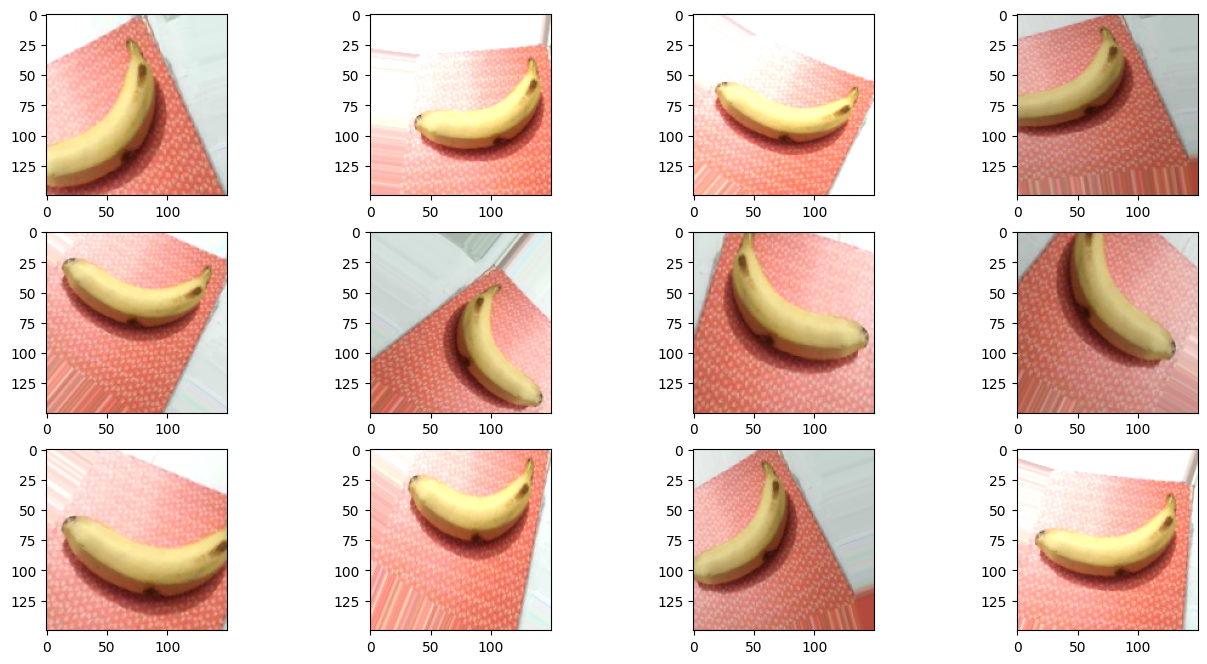

In [22]:

idx = 33 #@param {type:'slider', min:0, max:409}
display_augmented_images(train_healthy_banana_dir, idx)

In [28]:
model=Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,'relu'))
model.add(layers.Dense(4,'softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,454,660 (13.18 MB)

 Trainable params: 3,454,660 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile('rmsprop','categorical_crossentropy',metrics=['accuracy'])

In [ ]:
filepath = 'best_model_weights.hdf5'

checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


In [30]:
batch_size=32
steps_per_epoch=train_size//batch_size
validation_steps=valid_size//batch_size

history=model.fit(x=train_generator,
                  steps_per_epoch=steps_per_epoch,
                  epochs=40,
                  validation_data=valid_generator,
                  validation_steps=validation_steps,
                  callbacks=[checkpoint])

Epoch 1/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 881ms/step - accuracy: 0.2769 - loss: 1.6757 - val_accuracy: 0.2500 - val_loss: 1.3746
Epoch 2/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 865ms/step - accuracy: 0.2597 - loss: 1.4039 - val_accuracy: 0.3750 - val_loss: 1.3660
Epoch 3/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 726ms/step - accuracy: 0.3163 - loss: 1.3659 - val_accuracy: 0.5104 - val_loss: 1.2673
Epoch 4/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 974ms/step - accuracy: 0.5281 - loss: 1.2423 - val_accuracy: 0.5729 - val_loss: 1.1557
Epoch 5/40
 3/12 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.5041 - loss: 1.1418 

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 307ms/step - accuracy: 0.5218 - loss: 1.1400 - val_accuracy: 0.6354 - val_loss: 1.0986
Epoch 6/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.5054 - loss: 1.1125 - val_accuracy: 0.5833 - val_loss: 1.1372
Epoch 7/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 794ms/step - accuracy: 0.5060 - loss: 1.1516 - val_accuracy: 0.5208 - val_loss: 1.1468
Epoch 8/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 902ms/step - accuracy: 0.5414 - loss: 1.0648 - val_accuracy: 0.5833 - val_loss: 1.0484
Epoch 9/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 678ms/step - accuracy: 0.5353 - loss: 1.1025 - val_accuracy: 0.5833 - val_loss: 0.9655
Epoch 10/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 250ms/step - accuracy: 0.5048 - loss: 1.2583 - val_accuracy: 0.6667 - val_loss: 0.8522
Epoch 11/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 841ms/step - accuracy: 0.5623 - loss: 0.9954 - val_accuracy: 0.6771 - val_loss: 0.8731
Epoch 12/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 899ms/step - accuracy: 0.6084 - loss: 1.0174 - val_accuracy: 0.6354 - 

In [ ]:
best_model=Sequential()
best_model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
best_model.add(layers.MaxPooling2D((2,2)))
best_model.add(layers.Conv2D(64,(3,3),activation='relu'))
best_model.add(layers.MaxPooling2D((2,2)))
best_model.add(layers.Conv2D(128,(3,3),activation='relu'))
best_model.add(layers.MaxPooling2D((2,2)))
best_model.add(layers.Conv2D(128,(3,3),activation='relu'))
best_model.add(layers.MaxPooling2D((2,2)))
best_model.add(layers.Flatten())
best_model.add(layers.Dense(512,'relu'))
best_model.add(layers.Dense(4,'softmax'))
best_model.compile('rmsprop','categorical_crossentropy',metrics=['accuracy'])
best_model.load_weights('best_model_weights.hdf5')

In [31]:
def plot_hist(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['accuracy'], name='accuracy', mode='markers+lines'))
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['val_accuracy'], name='val_accuracy', mode='markers+lines'))
    fig.update_layout(width=1000, height=500, title='Accuracy vs. Val Accuracy', xaxis_title='Epoki', yaxis_title='Accuracy', yaxis_type='log')
    fig.show()

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['loss'], name='loss', mode='markers+lines'))
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['val_loss'], name='val_loss', mode='markers+lines'))
    fig.update_layout(width=1000, height=500, title='Loss vs. Val Loss', xaxis_title='Epoki', yaxis_title='Loss', yaxis_type='log')
    fig.show()

plot_hist(history)

In [32]:
test_datagen = ImageDataGenerator(rescale=1./255.)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=1,
    class_mode='binary',
    shuffle=False
)

y_prob = best_model.predict(test_generator, test_generator.samples)

y_prob

Found 224 images belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



224/224 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


array([[3.59162360e-01, 3.74671421e-03, 6.20300949e-01, 1.67899616e-02],
       [2.35620305e-01, 9.17166006e-04, 7.60130107e-01, 3.33236391e-03],
       [4.67140347e-01, 1.09964246e-02, 5.02996683e-01, 1.88665483e-02],
       [4.17828500e-01, 4.11990099e-03, 5.58090746e-01, 1.99608561e-02],
       [3.37724239e-01, 1.64114818e-01, 4.45810616e-01, 5.23502976e-02],
       [2.81877637e-01, 1.01646187e-03, 7.12315917e-01, 4.79003508e-03],
       [2.17511460e-01, 6.06067805e-03, 7.58627713e-01, 1.78002082e-02],
       [2.70975411e-01, 5.67052364e-02, 5.60643017e-01, 1.11676276e-01],
       [3.70821863e-01, 5.73277753e-03, 5.94268680e-01, 2.91767288e-02],
       [6.29364848e-01, 3.98419239e-03, 3.58635336e-01, 8.01566988e-03],
       [2.06611246e-01, 1.83325514e-01, 5.75313926e-01, 3.47492732e-02],
       [3.96503031e-01, 4.71265949e-02, 4.98224080e-01, 5.81463240e-02],
       [2.43002623e-01, 1.59609951e-02, 7.28157282e-01, 1.28790634e-02],
       [6.48997068e-01, 2.58567347e-03, 3.41774583e

In [36]:

y_pred =np.argmax(y_prob, axis=1)

y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 3, 3, 3, 3, 3, 1, 3, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 0, 0, 0, 2, 3, 3, 3,
       3, 3, 3, 3])

In [35]:
y_true = test_generator.classes
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3], dtype=int32)

In [37]:
test_generator.class_indices

{'healthyapple': 0, 'healthybanana': 1, 'rottenapple': 2, 'rottenbanana': 3}

In [38]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[35,  0, 21,  0],
       [ 6, 48,  2,  0],
       [ 3,  0, 52,  1],
       [ 4,  1,  4, 47]])

In [39]:
errors = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred}, index=test_generator.filenames)
errors.head()

,y_true,y_pred
healthyapple/FreshApple (109).jpg,0,2
healthyapple/FreshApple (120).jpg,0,2
healthyapple/FreshApple (125).jpg,0,2
healthyapple/FreshApple (128).jpg,0,2
healthyapple/FreshApple (140).jpg,0,2


In [40]:
errors['is_incorrect'] = (errors['y_true'] != errors['y_pred']) * 1
errors

,y_true,y_pred,is_incorrect
healthyapple/FreshApple (109).jpg,0,2,1
healthyapple/FreshApple (120).jpg,0,2,1
healthyapple/FreshApple (125).jpg,0,2,1
healthyapple/FreshApple (128).jpg,0,2,1
healthyapple/FreshApple (140).jpg,0,2,1
...,...,...,...
rottenbanana/rottenBanana (67).jpg,3,3,0
rottenbanana/rottenBanana (68).jpg,3,3,0
rottenbanana/rottenBanana (76).jpg,3,3,0
rottenbanana/rottenBanana (85).jpg,3,3,0


In [41]:
errors[errors['is_incorrect'] == 1].index

Index(['healthyapple/FreshApple (109).jpg',
       'healthyapple/FreshApple (120).jpg',
       'healthyapple/FreshApple (125).jpg',
       'healthyapple/FreshApple (128).jpg',
       'healthyapple/FreshApple (140).jpg', 'healthyapple/FreshApple (15).jpg',
       'healthyapple/FreshApple (16).jpg', 'healthyapple/FreshApple (168).jpg',
       'healthyapple/FreshApple (171).jpg',
       'healthyapple/FreshApple (187).jpg',
       'healthyapple/FreshApple (193).jpg',
       'healthyapple/FreshApple (198).jpg', 'healthyapple/FreshApple (72).jpg',
       'healthyapple/freshApple (206).jpg',
       'healthyapple/freshApple (209).jpg',
       'healthyapple/freshApple (226).jpg',
       'healthyapple/freshApple (253).jpg',
       'healthyapple/freshApple (264).jpg',
       'healthyapple/freshApple (268).jpg',
       'healthyapple/freshApple (270).jpg',
       'healthyapple/freshApple (319).jpg',
       'healthybanana/Banana__Healthy_augmented_40.jpg',
       'healthybanana/freshBanana (285).jpg

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

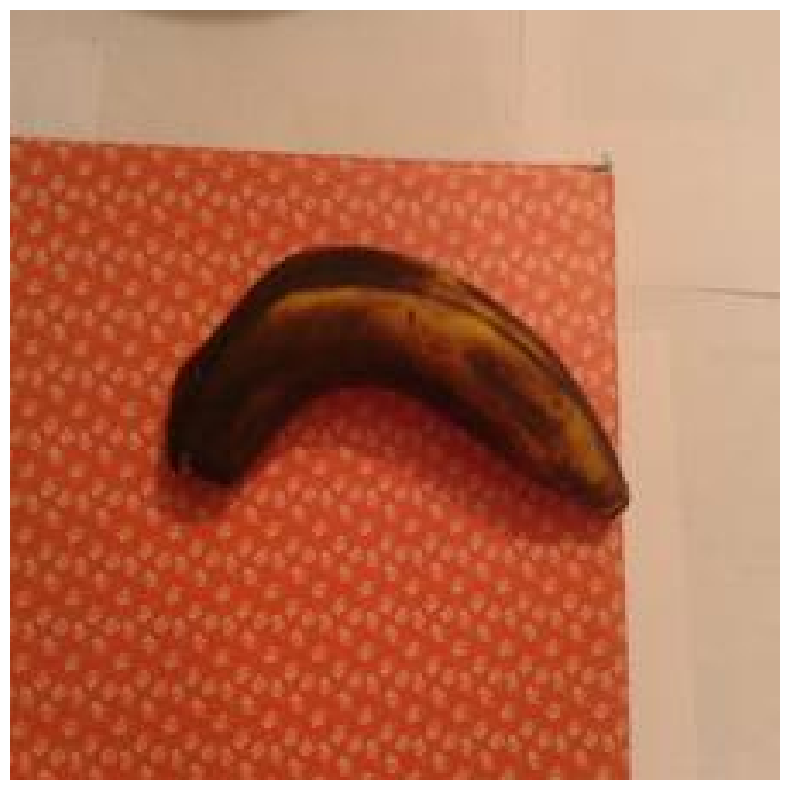

In [51]:
img_path = os.path.join(test_rotten_banana_dir, 'rottenBanana (550).jpg')

img = image.load_img(img_path)

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.grid(False)
plt.axis(False)

In [58]:
from tensorflow.keras.applications import InceptionV3
conv_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


model = Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(units=256, activation='relu'))
model.add(layers.Dense(units=4, activation='softmax'))

model.compile('rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 3, 3, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │     4,718,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,522,660 (101.18 MB)

 Trainable params: 4,719,876 (18.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [59]:
history=model.fit(x=train_generator,
                  steps_per_epoch=steps_per_epoch,
                  epochs=40,
                  validation_data=valid_generator,
                  validation_steps=validation_steps)

Epoch 1/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.3754 - loss: 51.9091 - val_accuracy: 0.8542 - val_loss: 1.4619
Epoch 2/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.7368 - loss: 3.7971 - val_accuracy: 0.8646 - val_loss: 1.0827
Epoch 3/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 921ms/step - accuracy: 0.7447 - loss: 4.2938 - val_accuracy: 0.8229 - val_loss: 1.9796
Epoch 4/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 753ms/step - accuracy: 0.7827 - loss: 3.2311 - val_accuracy: 0.8958 - val_loss: 0.7454
Epoch 5/40
 3/12 ━━━━━━━━━━━━━━━━━━━━ 6s 695ms/step - accuracy: 0.8247 - loss: 1.2807

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning:

Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.



12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 407ms/step - accuracy: 0.8312 - loss: 1.1465 - val_accuracy: 0.6979 - val_loss: 4.7769
Epoch 6/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 882ms/step - accuracy: 0.8482 - loss: 1.7488 - val_accuracy: 0.8229 - val_loss: 1.1841
Epoch 7/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 919ms/step - accuracy: 0.8110 - loss: 1.9758 - val_accuracy: 0.8854 - val_loss: 1.2380
Epoch 8/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 830ms/step - accuracy: 0.8802 - loss: 1.1281 - val_accuracy: 0.9271 - val_loss: 0.6825
Epoch 9/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 813ms/step - accuracy: 0.8808 - loss: 1.1398 - val_accuracy: 0.9271 - val_loss: 0.3577
Epoch 10/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 239ms/step - accuracy: 0.9089 - loss: 1.0853 - val_accuracy: 0.9375 - val_loss: 0.5617
Epoch 11/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 768ms/step - accuracy: 0.8638 - loss: 1.4290 - val_accuracy: 0.9167 - val_loss: 0.5411
Epoch 12/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 863ms/step - accuracy: 0.8664 - loss: 1.2002 - val_accuracy: 0.9583

In [60]:
y_prob = model.predict(test_generator, test_generator.samples)

y_prob

224/224 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step


array([[9.99975801e-01, 1.11626932e-14, 2.41696598e-05, 8.11792145e-20],
       [1.00000000e+00, 4.78793173e-20, 5.71480854e-08, 1.45870193e-25],
       [9.99752104e-01, 1.35728803e-15, 2.47911026e-04, 3.70799381e-20],
       [9.99793470e-01, 1.60599395e-15, 2.06579003e-04, 6.85044294e-20],
       [9.91661310e-01, 1.14494609e-13, 8.33869632e-03, 1.09761764e-17],
       [7.42385983e-01, 1.58950069e-13, 2.57614017e-01, 6.57328748e-16],
       [9.99763191e-01, 4.46394092e-16, 2.36767708e-04, 1.54203446e-20],
       [8.76592338e-01, 1.14297739e-16, 1.23407714e-01, 1.12141902e-21],
       [9.99942183e-01, 1.61698375e-17, 5.78341387e-05, 1.59608195e-22],
       [9.97923851e-01, 6.66711364e-15, 2.07614712e-03, 3.23954658e-18],
       [9.99917746e-01, 1.65099054e-14, 8.23005757e-05, 9.68653003e-19],
       [9.99997497e-01, 6.76009675e-18, 2.52384439e-06, 1.26674093e-23],
       [1.00000000e+00, 1.74692791e-20, 3.40610051e-09, 3.47318643e-28],
       [8.04377675e-01, 1.04759324e-14, 1.95622280e

In [61]:
y_pred =np.argmax(y_prob, axis=1)

y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 1, 3, 3,
       3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3,
       1, 3, 3, 3])

In [62]:
y_true = test_generator.classes
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3], dtype=int32)

In [63]:
errors = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred}, index=test_generator.filenames)
errors.head()
errors['is_incorrect'] = (errors['y_true'] != errors['y_pred']) * 1
errors

,y_true,y_pred,is_incorrect
healthyapple/FreshApple (109).jpg,0,0,0
healthyapple/FreshApple (120).jpg,0,0,0
healthyapple/FreshApple (125).jpg,0,0,0
healthyapple/FreshApple (128).jpg,0,0,0
healthyapple/FreshApple (140).jpg,0,0,0
...,...,...,...
rottenbanana/rottenBanana (67).jpg,3,3,0
rottenbanana/rottenBanana (68).jpg,3,1,1
rottenbanana/rottenBanana (76).jpg,3,3,0
rottenbanana/rottenBanana (85).jpg,3,3,0


In [71]:
errors[errors['is_incorrect'] == 1].index
incorrect_df = errors[errors['is_incorrect'] == 1][['y_pred']].copy()
incorrect_df.reset_index(inplace=True)
incorrect_df.rename(columns={'index': 'filepath'}, inplace=True)
incorrect_df

,filepath,y_pred
0,healthyapple/freshApple (209).jpg,2
1,rottenapple/rottenApple (218).jpg,0
2,rottenapple/rottenApple (241).jpg,0
3,rottenapple/rottenApple (245).jpg,0
4,rottenapple/rottenApple (305).jpg,0
5,rottenapple/rottenApple (427).jpg,0
6,rottenapple/rottenApple (524).jpg,0
7,rottenapple/rottenApple (563).jpg,0
8,rottenbanana/rottenBanana (139).jpg,1
9,rottenbanana/rottenBanana (199).jpg,1


(np.float64(-0.5), np.float64(3034.5), np.float64(3843.5), np.float64(-0.5))

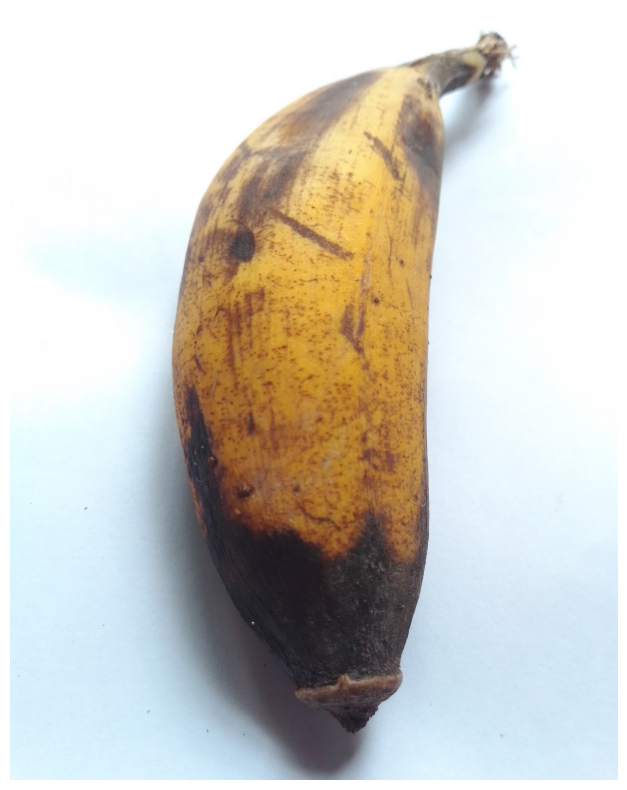

In [73]:
img_path = os.path.join(test_rotten_banana_dir, 'rottenBanana (139).jpg')

img = image.load_img(img_path)

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.grid(False)
plt.axis(False)

In [74]:
model.save("model.h5")

In [75]:
model.save("model.keras")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')